# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [130]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 데이터 셋 읽어오기

In [16]:
df_train = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [37]:
display(df_train.head()) # 학습용 데이터 살펴보기

print(df_train.shape)

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


(59299, 29)


In [116]:
"""
결측치 확인
결측 비율이 50% 이상인 변수 전처리를 위해 분리 (null_test_list 에 할당)
"""

row_num, col_num = df_train.shape

train_col = df_train.columns

null_test_list = []

for i in range(col_num):
    null_counts = df_train[train_col[i]].isnull().sum()
    print(train_col[i],'의 결측치 비율 : {0:.2f}'.format(null_counts/row_num*100),'%')
    print(train_col[i], '의 데이터 타입 :', df_train[train_col[i]].dtypes, '\n')
    
    if null_counts/row_num*100 >= 50:
        null_test_list.append(train_col[i])

bant_submit 의 결측치 비율 : 0.00 %
bant_submit 의 데이터 타입 : float64 

customer_country 의 결측치 비율 : 1.66 %
customer_country 의 데이터 타입 : object 

business_unit 의 결측치 비율 : 0.00 %
business_unit 의 데이터 타입 : object 

com_reg_ver_win_rate 의 결측치 비율 : 75.43 %
com_reg_ver_win_rate 의 데이터 타입 : float64 

customer_idx 의 결측치 비율 : 0.00 %
customer_idx 의 데이터 타입 : int64 

customer_type 의 결측치 비율 : 74.13 %
customer_type 의 데이터 타입 : object 

enterprise 의 결측치 비율 : 0.00 %
enterprise 의 데이터 타입 : object 

historical_existing_cnt 의 결측치 비율 : 76.80 %
historical_existing_cnt 의 데이터 타입 : float64 

id_strategic_ver 의 결측치 비율 : 94.19 %
id_strategic_ver 의 데이터 타입 : float64 

it_strategic_ver 의 결측치 비율 : 98.11 %
it_strategic_ver 의 데이터 타입 : float64 

idit_strategic_ver 의 결측치 비율 : 92.30 %
idit_strategic_ver 의 데이터 타입 : float64 

customer_job 의 결측치 비율 : 31.59 %
customer_job 의 데이터 타입 : object 

lead_desc_length 의 결측치 비율 : 0.00 %
lead_desc_length 의 데이터 타입 : int64 

inquiry_type 의 결측치 비율 : 1.59 %
inquiry_type 의 데이터 타입 : object 

product_categ

com_reg_ver_win_rate 변수가 결측치가 "맞는" 개수 : 44731
com_reg_ver_win_rate 변수가 결측치가 "아닌" 경우의 개수 : 14568 

com_reg_ver_win_rate 변수가 결측치가 "맞는" 경우의 target 비율 3584 / 41147 = 0.09
com_reg_ver_win_rate 변수가 결측치가 "아닌" 경우의 target 비율 1266 / 13302 = 0.10 



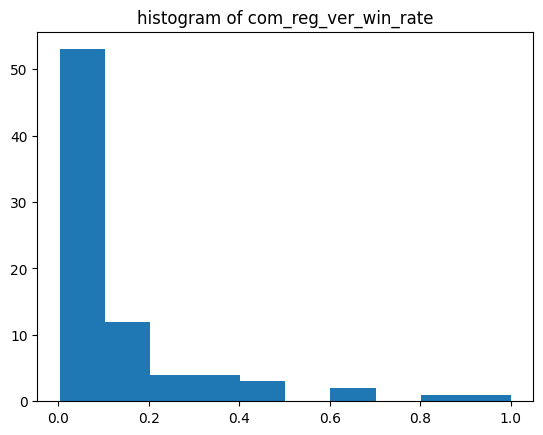

count    14568.000000
mean         0.091685
std          0.150988
min          0.003788
25%          0.019900
50%          0.049180
75%          0.074949
max          1.000000
Name: com_reg_ver_win_rate, dtype: float64 

customer_type 변수가 결측치가 "맞는" 개수 : 43961
customer_type 변수가 결측치가 "아닌" 경우의 개수 : 15338 

customer_type 변수가 결측치가 "맞는" 경우의 target 비율 2896 / 41065 = 0.07
customer_type 변수가 결측치가 "아닌" 경우의 target 비율 1954 / 13384 = 0.15 



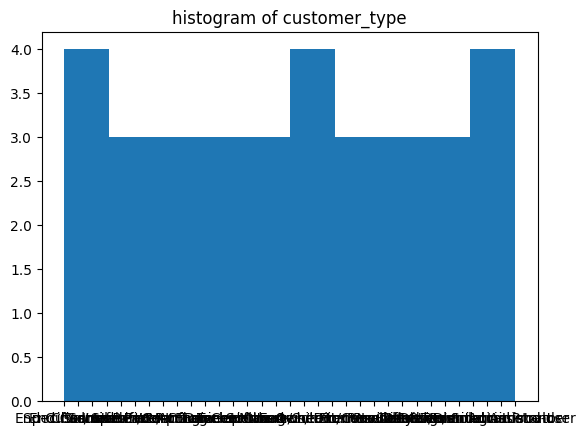

count            15338
unique              33
top       End-Customer
freq              6647
Name: customer_type, dtype: object 

historical_existing_cnt 변수가 결측치가 "맞는" 개수 : 45543
historical_existing_cnt 변수가 결측치가 "아닌" 경우의 개수 : 13756 

historical_existing_cnt 변수가 결측치가 "맞는" 경우의 target 비율 4182 / 41361 = 0.10
historical_existing_cnt 변수가 결측치가 "아닌" 경우의 target 비율 668 / 13088 = 0.05 



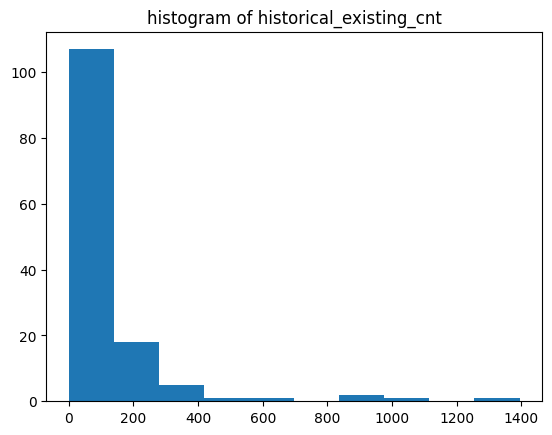

count    13756.000000
mean        19.912184
std         44.697938
min          0.000000
25%          1.000000
50%          4.000000
75%         19.000000
max       1394.000000
Name: historical_existing_cnt, dtype: float64 

id_strategic_ver 변수가 결측치가 "맞는" 개수 : 55855
id_strategic_ver 변수가 결측치가 "아닌" 경우의 개수 : 3444 

id_strategic_ver 변수가 결측치가 "맞는" 경우의 target 비율 4515 / 51340 = 0.09
id_strategic_ver 변수가 결측치가 "아닌" 경우의 target 비율 335 / 3109 = 0.11 



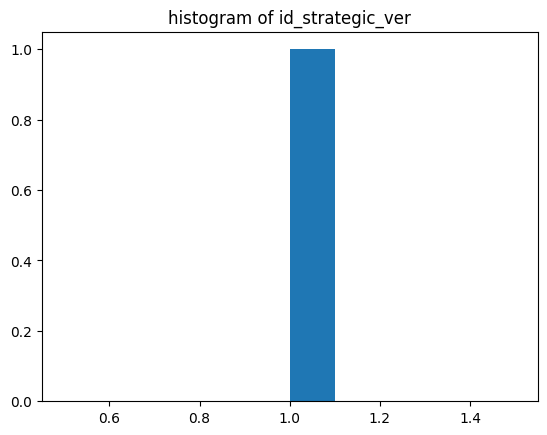

count    3444.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: id_strategic_ver, dtype: float64 

it_strategic_ver 변수가 결측치가 "맞는" 개수 : 58178
it_strategic_ver 변수가 결측치가 "아닌" 경우의 개수 : 1121 

it_strategic_ver 변수가 결측치가 "맞는" 경우의 target 비율 4837 / 53341 = 0.09
it_strategic_ver 변수가 결측치가 "아닌" 경우의 target 비율 13 / 1108 = 0.01 



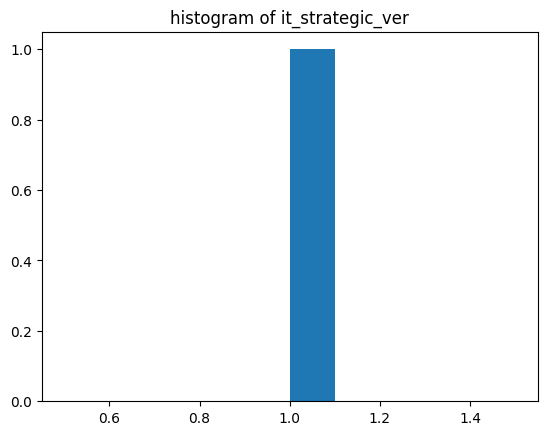

count    1121.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: it_strategic_ver, dtype: float64 

idit_strategic_ver 변수가 결측치가 "맞는" 개수 : 54734
idit_strategic_ver 변수가 결측치가 "아닌" 경우의 개수 : 4565 

idit_strategic_ver 변수가 결측치가 "맞는" 경우의 target 비율 4502 / 50232 = 0.09
idit_strategic_ver 변수가 결측치가 "아닌" 경우의 target 비율 348 / 4217 = 0.08 



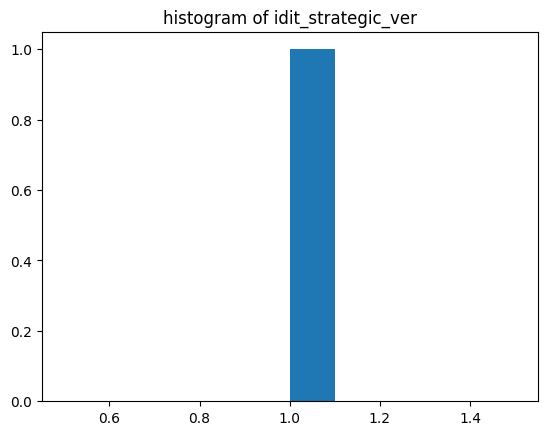

count    4565.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: idit_strategic_ver, dtype: float64 

product_subcategory 변수가 결측치가 "맞는" 개수 : 50064
product_subcategory 변수가 결측치가 "아닌" 경우의 개수 : 9235 

product_subcategory 변수가 결측치가 "맞는" 경우의 target 비율 3508 / 46556 = 0.08
product_subcategory 변수가 결측치가 "아닌" 경우의 target 비율 1342 / 7893 = 0.17 



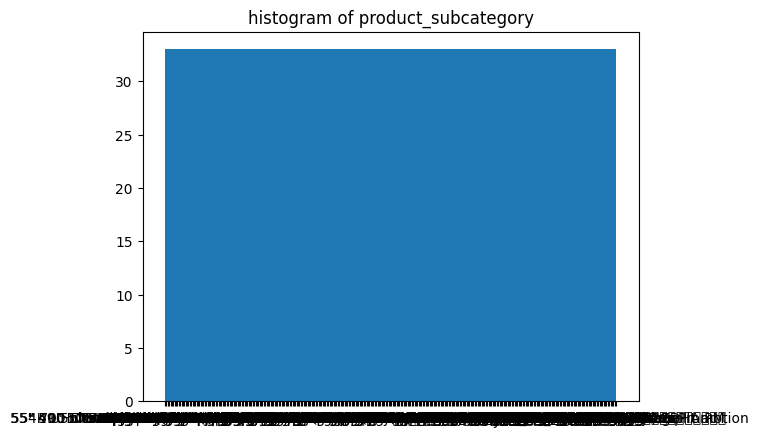

count                     9235
unique                     330
top       All Medical Displays
freq                       446
Name: product_subcategory, dtype: object 

product_modelname 변수가 결측치가 "맞는" 개수 : 50070
product_modelname 변수가 결측치가 "아닌" 경우의 개수 : 9229 

product_modelname 변수가 결측치가 "맞는" 경우의 target 비율 3720 / 46350 = 0.08
product_modelname 변수가 결측치가 "아닌" 경우의 target 비율 1130 / 8099 = 0.14 



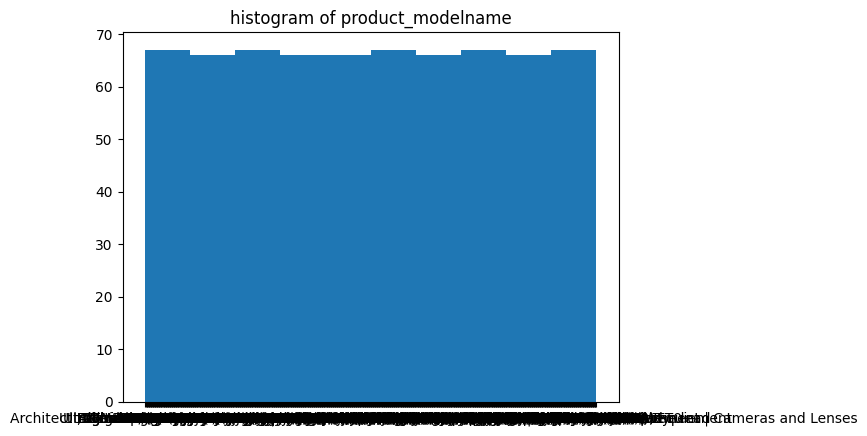

count                        9229
unique                        665
top       UltraFine Ergo(32UN880)
freq                          523
Name: product_modelname, dtype: object 

expected_timeline 변수가 결측치가 "맞는" 개수 : 30863
expected_timeline 변수가 결측치가 "아닌" 경우의 개수 : 28436 

expected_timeline 변수가 결측치가 "맞는" 경우의 target 비율 2298 / 28565 = 0.08
expected_timeline 변수가 결측치가 "아닌" 경우의 target 비율 2552 / 25884 = 0.10 



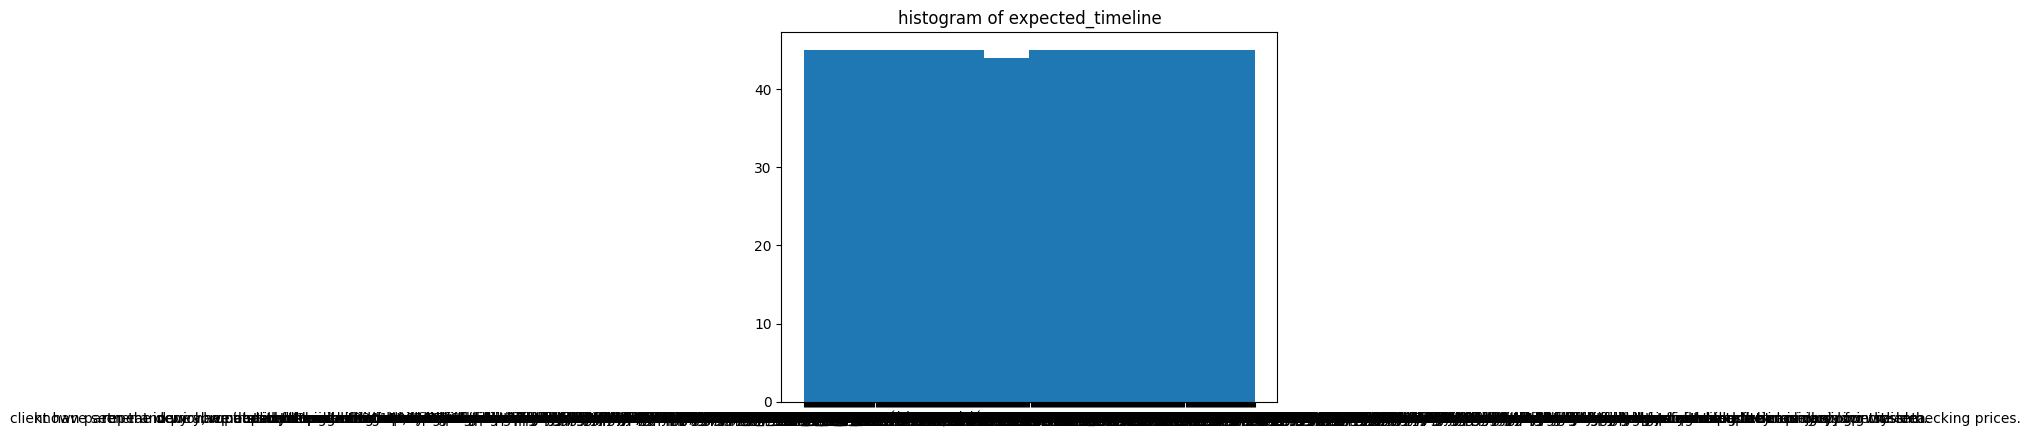

count                  28436
unique                   449
top       less than 3 months
freq                   17250
Name: expected_timeline, dtype: object 

ver_win_rate_x 변수가 결측치가 "맞는" 개수 : 40882
ver_win_rate_x 변수가 결측치가 "아닌" 경우의 개수 : 18417 

ver_win_rate_x 변수가 결측치가 "맞는" 경우의 target 비율 3476 / 37406 = 0.09
ver_win_rate_x 변수가 결측치가 "아닌" 경우의 target 비율 1374 / 17043 = 0.08 



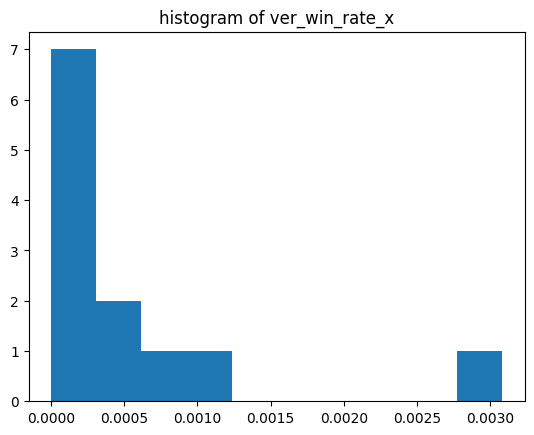

count    18417.000000
mean         0.001117
std          0.001104
min          0.000002
25%          0.000298
50%          0.000572
75%          0.001183
max          0.003079
Name: ver_win_rate_x, dtype: float64 

ver_win_ratio_per_bu 변수가 결측치가 "맞는" 개수 : 43995
ver_win_ratio_per_bu 변수가 결측치가 "아닌" 경우의 개수 : 15304 

ver_win_ratio_per_bu 변수가 결측치가 "맞는" 경우의 target 비율 3892 / 40103 = 0.10
ver_win_ratio_per_bu 변수가 결측치가 "아닌" 경우의 target 비율 958 / 14346 = 0.07 



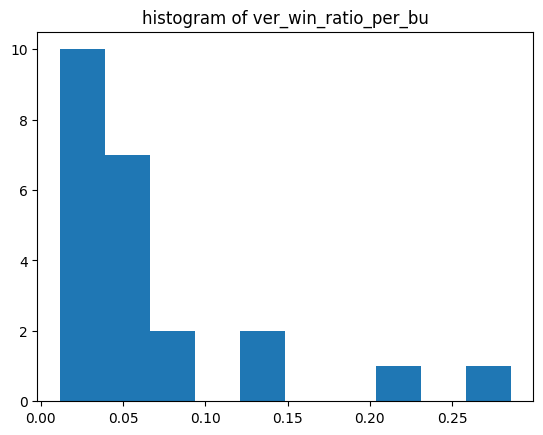

count    15304.000000
mean         0.049288
std          0.027949
min          0.011583
25%          0.026846
50%          0.049840
75%          0.064566
max          0.285714
Name: ver_win_ratio_per_bu, dtype: float64 

business_area 변수가 결측치가 "맞는" 개수 : 40882
business_area 변수가 결측치가 "아닌" 경우의 개수 : 18417 

business_area 변수가 결측치가 "맞는" 경우의 target 비율 3476 / 37406 = 0.09
business_area 변수가 결측치가 "아닌" 경우의 target 비율 1374 / 17043 = 0.08 



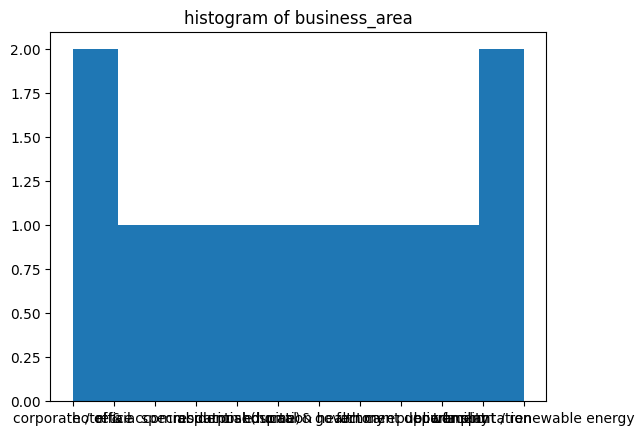

count                  18417
unique                    12
top       corporate / office
freq                    4097
Name: business_area, dtype: object 

business_subarea 변수가 결측치가 "맞는" 개수 : 53773
business_subarea 변수가 결측치가 "아닌" 경우의 개수 : 5526 

business_subarea 변수가 결측치가 "맞는" 경우의 target 비율 3833 / 49940 = 0.08
business_subarea 변수가 결측치가 "아닌" 경우의 target 비율 1017 / 4509 = 0.23 



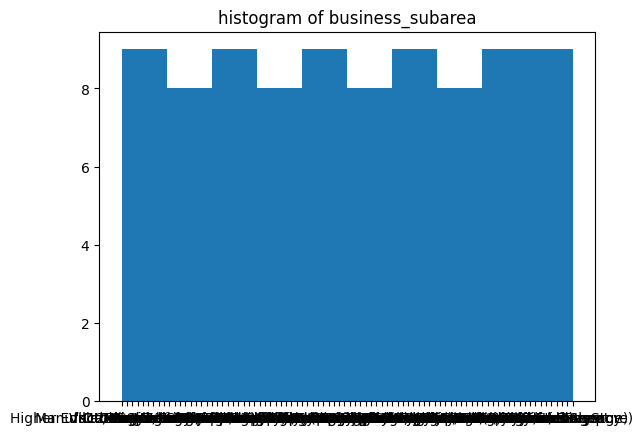

count       5526
unique        86
top       Others
freq        1740
Name: business_subarea, dtype: object 



In [136]:
"""
결측치 50% 이상인 column에 간략한 분석
1. 결측치의 개수
2. 결측치 아닌 것의 개수
3. 결측치인 row에 대해 target의 개수 분류
4. 결측치가 아닌 row에 대해 target의 개수 분류

5. histogram
6. 기술통계량
"""

def nullcounts_with_target(colname):
    print('{} 변수가 결측치가 "맞는" 개수 :'.format(colname), df_train[colname].isnull().sum())
    print('{} 변수가 결측치가 "아닌" 경우의 개수 :'.format(colname), df_train[colname].value_counts().values.sum(), '\n')
    
    isnull_series = df_train[df_train[colname].isnull()]['is_converted'].value_counts()
    notnull_series = df_train[df_train[colname].notnull()]['is_converted'].value_counts()
    print('{} 변수가 결측치가 "맞는" 경우의 target 비율'.format(colname), '{0} / {1} = {2:.2f}'.format(isnull_series[1], isnull_series[0], isnull_series[1]/isnull_series[0]))
    print('{} 변수가 결측치가 "아닌" 경우의 target 비율'.format(colname), '{0} / {1} = {2:.2f}'.format(notnull_series[1], notnull_series[0], notnull_series[1]/notnull_series[0]), '\n')

    plt.hist(df_train[colname].value_counts().keys())
    plt.title('histogram of {}'.format(colname))
    plt.show()
    
    print(df_train[colname].describe(), '\n')
    
for null_colname in null_test_list:
    nullcounts_with_target(null_colname)

com_reg_ver_win_rate 변수가 결측치가 "맞는" 개수 : 44731
com_reg_ver_win_rate 변수가 결측치가 "아닌" 경우의 개수 : 14568 

com_reg_ver_win_rate 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    41147
True      3584
Name: count, dtype: int64


com_reg_ver_win_rate 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    13302
True      1266
Name: count, dtype: int64




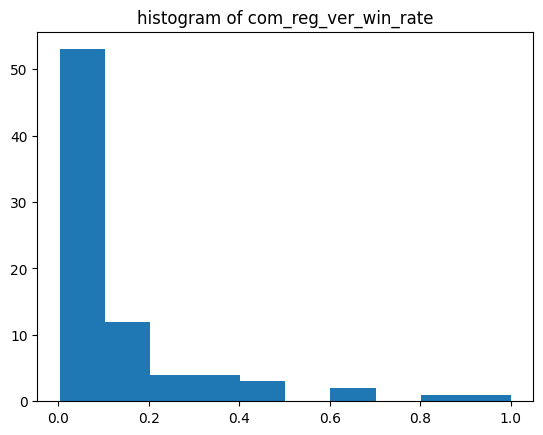

count    14568.000000
mean         0.091685
std          0.150988
min          0.003788
25%          0.019900
50%          0.049180
75%          0.074949
max          1.000000
Name: com_reg_ver_win_rate, dtype: float64
customer_type 변수가 결측치가 "맞는" 개수 : 43961
customer_type 변수가 결측치가 "아닌" 경우의 개수 : 15338 

customer_type 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    41065
True      2896
Name: count, dtype: int64


customer_type 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    13384
True      1954
Name: count, dtype: int64




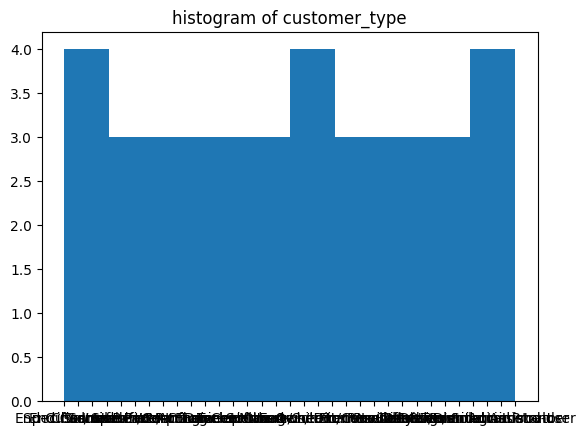

count            15338
unique              33
top       End-Customer
freq              6647
Name: customer_type, dtype: object
historical_existing_cnt 변수가 결측치가 "맞는" 개수 : 45543
historical_existing_cnt 변수가 결측치가 "아닌" 경우의 개수 : 13756 

historical_existing_cnt 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    41361
True      4182
Name: count, dtype: int64


historical_existing_cnt 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    13088
True       668
Name: count, dtype: int64




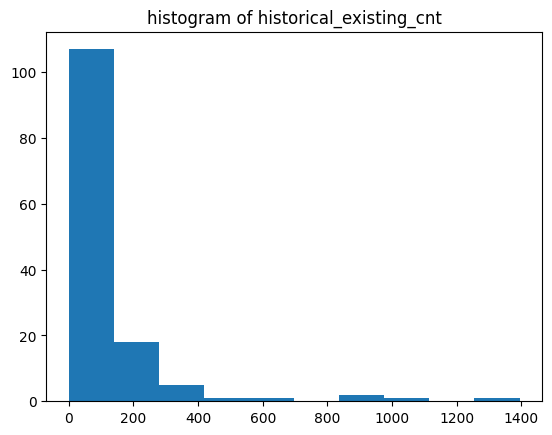

count    13756.000000
mean        19.912184
std         44.697938
min          0.000000
25%          1.000000
50%          4.000000
75%         19.000000
max       1394.000000
Name: historical_existing_cnt, dtype: float64
id_strategic_ver 변수가 결측치가 "맞는" 개수 : 55855
id_strategic_ver 변수가 결측치가 "아닌" 경우의 개수 : 3444 

id_strategic_ver 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    51340
True      4515
Name: count, dtype: int64


id_strategic_ver 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    3109
True      335
Name: count, dtype: int64




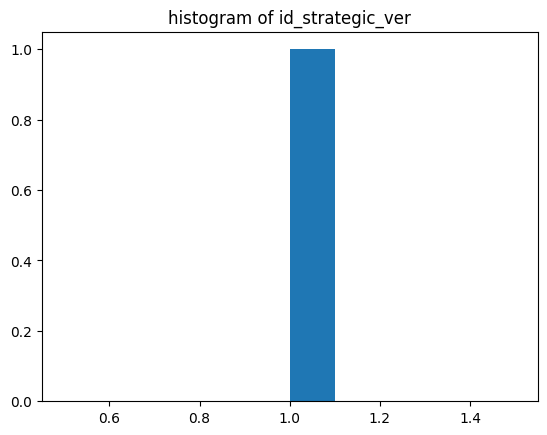

count    3444.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: id_strategic_ver, dtype: float64
it_strategic_ver 변수가 결측치가 "맞는" 개수 : 58178
it_strategic_ver 변수가 결측치가 "아닌" 경우의 개수 : 1121 

it_strategic_ver 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    53341
True      4837
Name: count, dtype: int64


it_strategic_ver 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    1108
True       13
Name: count, dtype: int64




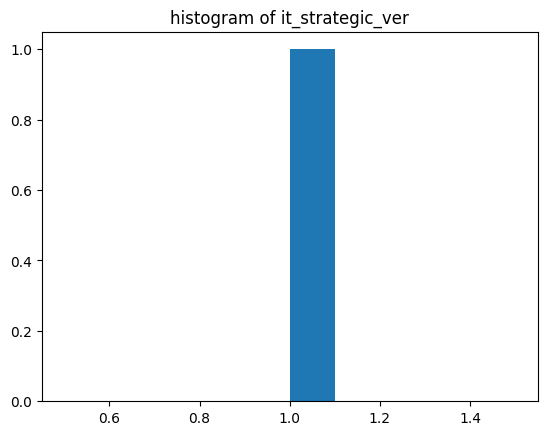

count    1121.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: it_strategic_ver, dtype: float64
idit_strategic_ver 변수가 결측치가 "맞는" 개수 : 54734
idit_strategic_ver 변수가 결측치가 "아닌" 경우의 개수 : 4565 

idit_strategic_ver 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    50232
True      4502
Name: count, dtype: int64


idit_strategic_ver 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    4217
True      348
Name: count, dtype: int64




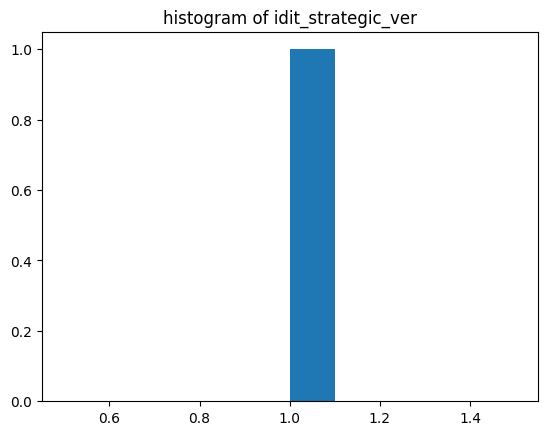

count    4565.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: idit_strategic_ver, dtype: float64
product_subcategory 변수가 결측치가 "맞는" 개수 : 50064
product_subcategory 변수가 결측치가 "아닌" 경우의 개수 : 9235 

product_subcategory 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    46556
True      3508
Name: count, dtype: int64


product_subcategory 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    7893
True     1342
Name: count, dtype: int64




/home/elicer/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36879 (\N{CJK UNIFIED IDEOGRAPH-900F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/elicer/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26126 (\N{CJK UNIFIED IDEOGRAPH-660E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/elicer/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35320 (\N{CJK UNIFIED IDEOGRAPH-89F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/elicer/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25511 (\N{CJK UNIFIED IDEOGRAPH-63A7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/elicer/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39023 (\N{CJK UNIFIED IDEOGRAPH-986F}) missing from current font.
  

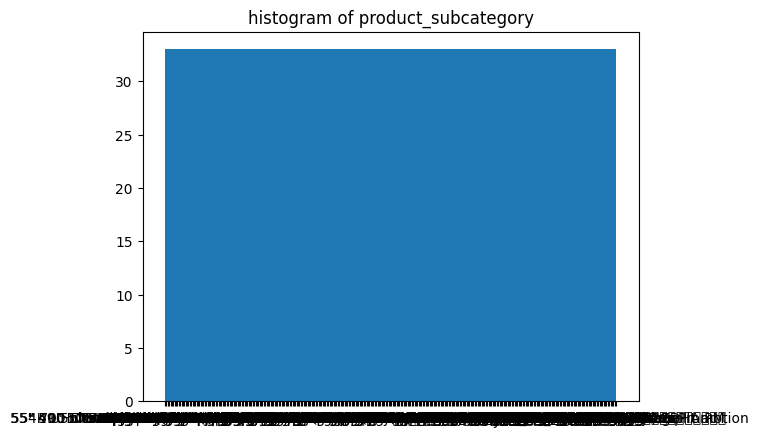

count                     9235
unique                     330
top       All Medical Displays
freq                       446
Name: product_subcategory, dtype: object
product_modelname 변수가 결측치가 "맞는" 개수 : 50070
product_modelname 변수가 결측치가 "아닌" 경우의 개수 : 9229 

product_modelname 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    46350
True      3720
Name: count, dtype: int64


product_modelname 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    8099
True     1130
Name: count, dtype: int64




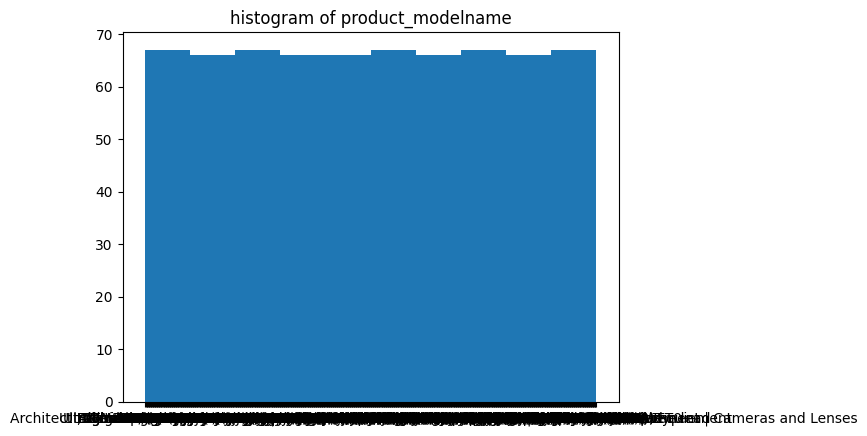

count                        9229
unique                        665
top       UltraFine Ergo(32UN880)
freq                          523
Name: product_modelname, dtype: object
expected_timeline 변수가 결측치가 "맞는" 개수 : 30863
expected_timeline 변수가 결측치가 "아닌" 경우의 개수 : 28436 

expected_timeline 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    28565
True      2298
Name: count, dtype: int64


expected_timeline 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    25884
True      2552
Name: count, dtype: int64




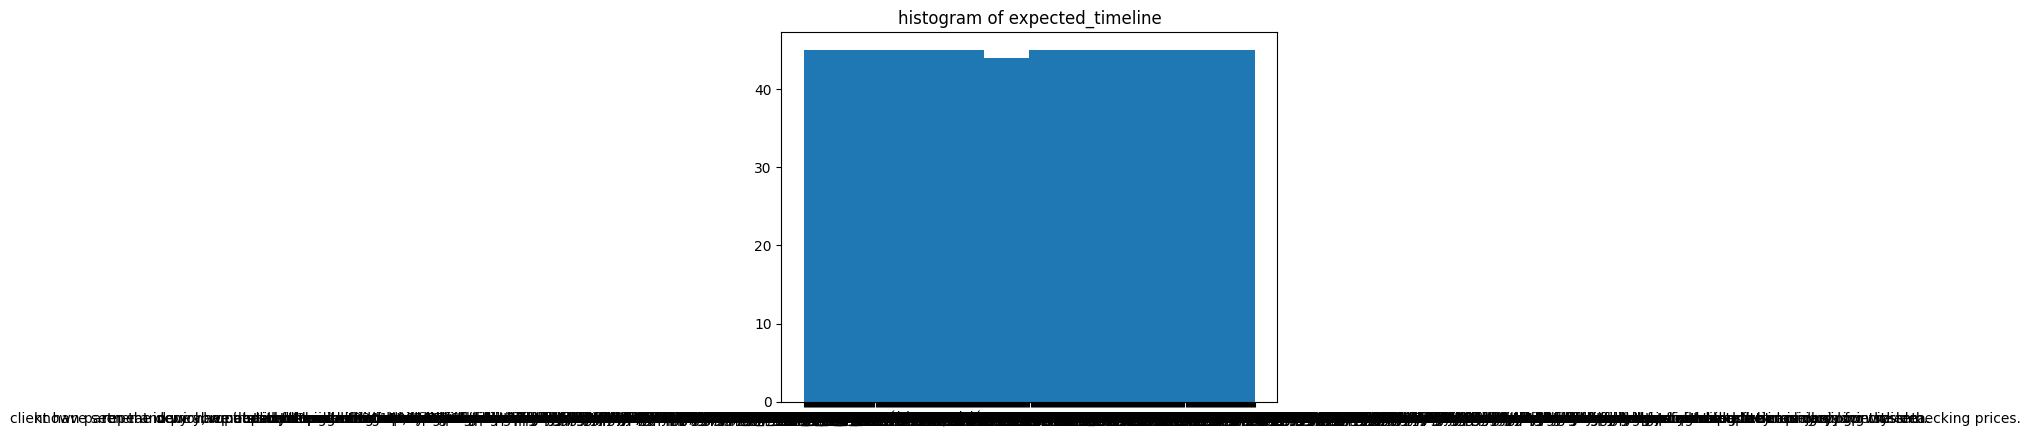

count                  28436
unique                   449
top       less than 3 months
freq                   17250
Name: expected_timeline, dtype: object
ver_win_rate_x 변수가 결측치가 "맞는" 개수 : 40882
ver_win_rate_x 변수가 결측치가 "아닌" 경우의 개수 : 18417 

ver_win_rate_x 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    37406
True      3476
Name: count, dtype: int64


ver_win_rate_x 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    17043
True      1374
Name: count, dtype: int64




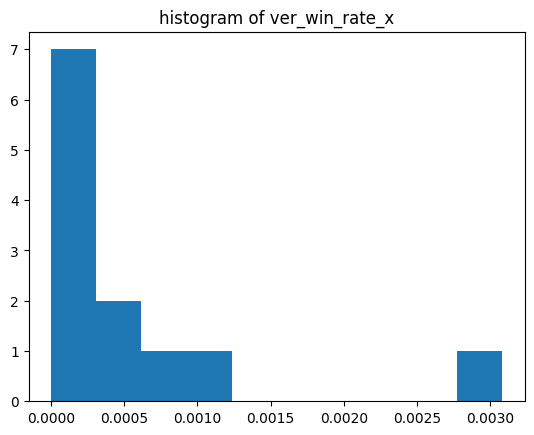

count    18417.000000
mean         0.001117
std          0.001104
min          0.000002
25%          0.000298
50%          0.000572
75%          0.001183
max          0.003079
Name: ver_win_rate_x, dtype: float64
ver_win_ratio_per_bu 변수가 결측치가 "맞는" 개수 : 43995
ver_win_ratio_per_bu 변수가 결측치가 "아닌" 경우의 개수 : 15304 

ver_win_ratio_per_bu 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    40103
True      3892
Name: count, dtype: int64


ver_win_ratio_per_bu 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    14346
True       958
Name: count, dtype: int64




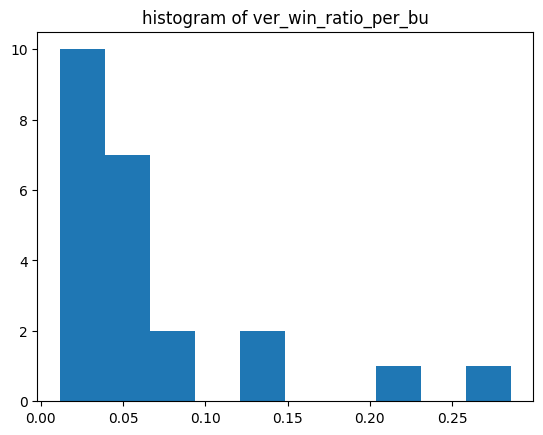

count    15304.000000
mean         0.049288
std          0.027949
min          0.011583
25%          0.026846
50%          0.049840
75%          0.064566
max          0.285714
Name: ver_win_ratio_per_bu, dtype: float64
business_area 변수가 결측치가 "맞는" 개수 : 40882
business_area 변수가 결측치가 "아닌" 경우의 개수 : 18417 

business_area 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    37406
True      3476
Name: count, dtype: int64


business_area 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    17043
True      1374
Name: count, dtype: int64




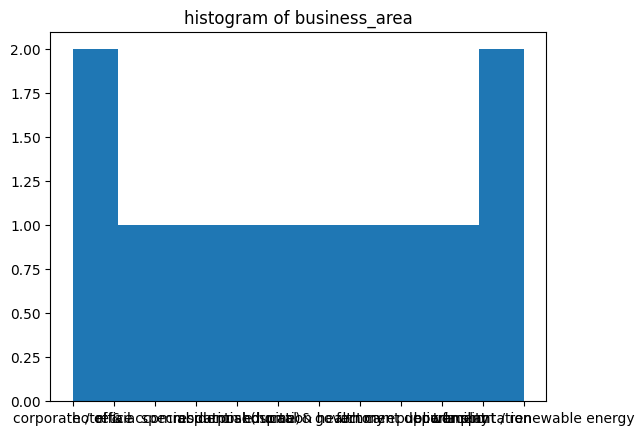

count                  18417
unique                    12
top       corporate / office
freq                    4097
Name: business_area, dtype: object
business_subarea 변수가 결측치가 "맞는" 개수 : 53773
business_subarea 변수가 결측치가 "아닌" 경우의 개수 : 5526 

business_subarea 변수가 결측치가 "맞는" 경우의 target 분포
is_converted
False    49940
True      3833
Name: count, dtype: int64


business_subarea 변수가 결측치가 "아닌" 경우의 target 분포
is_converted
False    4509
True     1017
Name: count, dtype: int64




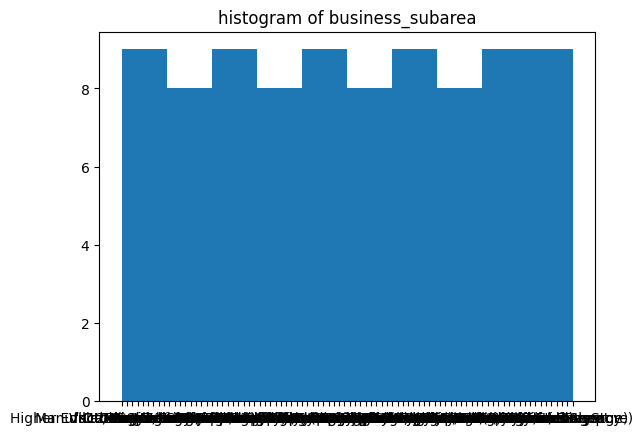

count       5526
unique        86
top       Others
freq        1740
Name: business_subarea, dtype: object


In [40]:
"""
불균형 False : 54449, True : 4850 으로 불균형 약 11:1
Resampling 기법으로 높여주는 것 좋은 방법이 될 듯! (SMOTE?)
"""

df_train['is_converted'].value_counts()

is_converted
False    54449
True      4850
Name: count, dtype: int64

In [49]:
"""
numeric : 13개 (실수 : 8, 정수 : 5)
categorical : 15개
bool : target
"""

df_train.dtypes.value_counts()

object     15
float64     8
int64       5
bool        1
Name: count, dtype: int64

In [55]:
df_train.columns

'bant_submit'

In [59]:
train_col = df_train.columns

for i in range(len(train_col)):
    if df_train[train_col[i]].dtypes == 'object':
        print(df_train[train_col[i]].counts())

AttributeError: 'Series' object has no attribute 'counts'

In [20]:
df_train['customer_country'].value_counts()

customer_country
//India                                   3037
/São Paulo/Brazil                         1344
//United States                            962
//United Kingdom                           805
//Saudi Arabia                             718
                                          ... 
/Hydrated/India                              1
/Tirurangadi, Malappuram, Kerala/India       1
/Canoinhas / SC/Brazil                       1
/Tupã/SP/Brazil                              1
/paris/France                                1
Name: count, Length: 15399, dtype: int64

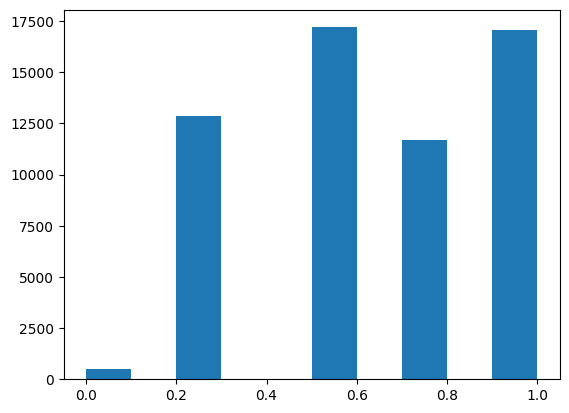

bant_submit
0.50    17192
1.00    17061
0.25    12852
0.75    11681
0.00      513
Name: count, dtype: int64

In [30]:
plt.hist(df_train['bant_submit'])
plt.show()

df_train['bant_submit'].value_counts()

In [36]:
temp_df = df_train[df_train['bant_submit']==0]
temp_df['is_converted'].value_counts()

is_converted
False    431
True      82
Name: count, dtype: int64

## 2. 데이터 전처리

### 레이블 인코딩

In [ ]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [ ]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

다시 학습 데이터와 제출 데이터를 분리합니다.

In [ ]:
for col in label_columns:  
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

### 2-2. 학습, 검증 데이터 분리

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train.drop("is_converted", axis=1),
    df_train["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

### 모델 정의 

In [ ]:
model = DecisionTreeClassifier()

### 모델 학습

In [ ]:
model.fit(x_train.fillna(0), y_train)

### 모델 성능 보기

In [ ]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [ ]:
pred = model.predict(x_val.fillna(0))
get_clf_eval(y_val, pred)

## 4. 제출하기

### 테스트 데이터 예측

In [ ]:
# 예측에 필요한 데이터 분리
x_test = df_test.drop(["is_converted", "id"], axis=1)

In [ ]:
test_pred = model.predict(x_test.fillna(0))
sum(test_pred) # True로 예측된 개수

### 제출 파일 작성

In [ ]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**